In [26]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
import warnings
warnings.filterwarnings("ignore")

In [28]:
data=pd.read_csv("car_evaluation.csv",header=None)

In [29]:
data.head()


,0,1,2,3,4,5,6
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [30]:
data.shape

(1728, 7)

In [31]:
col_names = ['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']


data.columns = col_names

col_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety', 'class']

In [32]:
data.head()

,buying,maint,doors,persons,lug_boot,safety,class
0,vhigh,vhigh,2,2,small,low,unacc
1,vhigh,vhigh,2,2,small,med,unacc
2,vhigh,vhigh,2,2,small,high,unacc
3,vhigh,vhigh,2,2,med,low,unacc
4,vhigh,vhigh,2,2,med,med,unacc


In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1728 entries, 0 to 1727
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   buying    1728 non-null   object
 1   maint     1728 non-null   object
 2   doors     1728 non-null   object
 3   persons   1728 non-null   object
 4   lug_boot  1728 non-null   object
 5   safety    1728 non-null   object
 6   class     1728 non-null   object
dtypes: object(7)
memory usage: 94.6+ KB


In [34]:
for var in data.columns:
 print(data[var].value_counts())

vhigh    432
high     432
med      432
low      432
Name: buying, dtype: int64
vhigh    432
high     432
med      432
low      432
Name: maint, dtype: int64
2        432
3        432
4        432
5more    432
Name: doors, dtype: int64
2       576
4       576
more    576
Name: persons, dtype: int64
small    576
med      576
big      576
Name: lug_boot, dtype: int64
low     576
med     576
high    576
Name: safety, dtype: int64
unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64


In [35]:
for var in data.columns:
 print(f"{var}",data[var].unique())

buying ['vhigh' 'high' 'med' 'low']
maint ['vhigh' 'high' 'med' 'low']
doors ['2' '3' '4' '5more']
persons ['2' '4' 'more']
lug_boot ['small' 'med' 'big']
safety ['low' 'med' 'high']
class ['unacc' 'acc' 'vgood' 'good']


In [36]:
data["class"].value_counts()

unacc    1210
acc       384
good       69
vgood      65
Name: class, dtype: int64

In [37]:
data.isna().sum()

buying      0
maint       0
doors       0
persons     0
lug_boot    0
safety      0
class       0
dtype: int64

In [38]:
X=data.drop("class",axis=1)
y=data["class"]

In [39]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.8,random_state=42,shuffle=True)

In [40]:
X_train.shape,X_test.shape

((1382, 6), (346, 6))

In [41]:
X_train.dtypes

buying      object
maint       object
doors       object
persons     object
lug_boot    object
safety      object
dtype: object

In [42]:
col_name_training=X_train.columns
col_name_training

Index(['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety'], dtype='object')

In [43]:
from category_encoders import OrdinalEncoder
encoders=OrdinalEncoder(cols=col_name_training)
X_train=encoders.fit_transform(X_train)
X_test=encoders.transform(X_test)

In [44]:
X_train.head()

,buying,maint,doors,persons,lug_boot,safety
107,1,1,1,1,1,1
901,2,1,2,2,2,2
1709,3,2,1,3,1,1
706,4,3,3,3,3,2
678,4,3,2,3,3,3


In [45]:
X_test.head()

,buying,maint,doors,persons,lug_boot,safety
599,4,4,3,3,3,1
1201,2,2,4,2,3,2
628,4,4,1,3,1,2
1498,3,4,1,2,3,2
1263,2,2,3,1,3,3


In [46]:
from sklearn.tree import DecisionTreeClassifier,DecisionTreeRegressor

In [47]:
decisionTreeClassifier_gini=DecisionTreeClassifier(criterion="gini",max_depth=4,random_state=42)
decisionTreeClassifier_gini.fit(X_train,y_train)

DecisionTreeClassifier(max_depth=4, random_state=42)

In [48]:
y_pred_gini=decisionTreeClassifier_gini.predict(X_test)

In [49]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [50]:
print(f"accuracy {accuracy_score(y_test,y_pred_gini)}")
print(f"classification_report {classification_report(y_test,y_pred_gini)}")

accuracy 0.8121387283236994
classification_report               precision    recall  f1-score   support

         acc       0.61      0.60      0.61        83
        good       0.00      0.00      0.00        11
       unacc       0.88      0.98      0.93       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.81       346
   macro avg       0.37      0.40      0.38       346
weighted avg       0.74      0.81      0.77       346



In [51]:
print(f" training set accuracy {decisionTreeClassifier_gini.score(X_train,y_train)}")
print(f" testing set accuracy {decisionTreeClassifier_gini.score(X_test,y_test)}")

 training set accuracy 0.8039073806078147
 testing set accuracy 0.8121387283236994


In [52]:
! pip install graphviz

ERROR: Could not find a version that satisfies the requirement graphviz (from versions: none)
ERROR: No matching distribution found for graphviz


In [53]:
clf_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)


# fit the model
clf_en.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [54]:
y_pred_en = clf_en.predict(X_test)
print('Model accuracy score with criterion entropy: {0:0.4f}'. format(accuracy_score(y_test, y_pred_en)))


Model accuracy score with criterion entropy: 0.8179


In [55]:

print('Training set score: {:.4f}'.format(clf_en.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(clf_en.score(X_test, y_test)))

Training set score: 0.8025
Test set score: 0.8179


In [56]:
from sklearn.model_selection import GridSearchCV
para_grid={
            "criterion":["entropy","gini","log_loss"],
            "max_depth":[2, 3, 4, 5, 6, 7, 8],
            'min_samples_split': [2, 5, 10],
            'min_samples_leaf': [1, 2, 4]
}
dt = DecisionTreeClassifier()
gride_model=GridSearchCV(estimator=dt,param_grid=para_grid,n_jobs=-1,scoring="accuracy",verbose=1,cv=5)

gride_model.fit(X_train,y_train)

print("Best hyperparameters:", gride_model.best_params_)
print("Best accuracy score:", gride_model.best_score_)

best_model_grid = gride_model.best_estimator_

Fitting 5 folds for each of 189 candidates, totalling 945 fits
Best hyperparameters: {'criterion': 'entropy', 'max_depth': 8, 'min_samples_leaf': 1, 'min_samples_split': 10}
Best accuracy score: 0.9261811332600847


In [57]:
y_pred__grid=best_model_grid.predict(X_test)
print(f"accuracy_score {accuracy_score(y_test,y_pred__grid)}")

accuracy_score 0.9421965317919075


In [58]:
print(f"accuracy_score training  {best_model_grid.score(X_train,y_train)}")
print(f"accuracy_score testing {best_model_grid.score(X_test,y_test)}")


accuracy_score training  0.9327062228654125
accuracy_score testing 0.9421965317919075


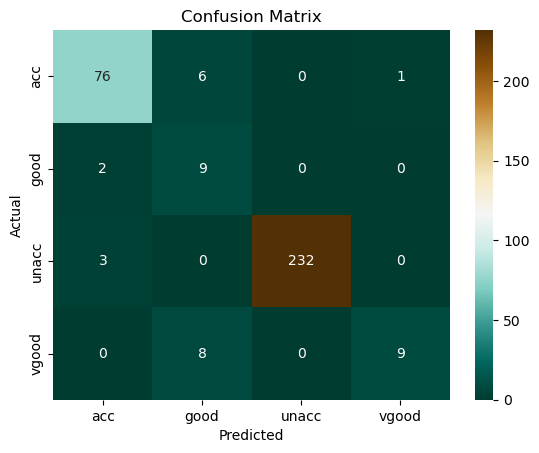

In [61]:
cm=confusion_matrix(y_test,y_pred__grid)
sns.heatmap(data=cm,annot=True,cmap="BrBG_r",fmt="d",xticklabels=np.unique(y_test),yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


In [62]:
from sklearn.metrics import classification_report

print(classification_report(y_test, y_pred__grid, digits=4))

              precision    recall  f1-score   support

         acc     0.9383    0.9157    0.9268        83
        good     0.3913    0.8182    0.5294        11
       unacc     1.0000    0.9872    0.9936       235
       vgood     0.9000    0.5294    0.6667        17

    accuracy                         0.9422       346
   macro avg     0.8074    0.8126    0.7791       346
weighted avg     0.9609    0.9422    0.9467       346



In [63]:
from sklearn.linear_model import LogisticRegression
logistModel=LogisticRegression()
param_gridlog={
             "penalty": ['l1', 'l2', 'elasticnet'] ,
             'C': [0.001, 0.01, 0.1, 1, 10, 100],
             "solver": ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'],
             "max_iter": [50,80,100] 
}
grid_search_logistic=GridSearchCV(estimator=logistModel,cv=5,scoring="accuracy",param_grid=param_gridlog)
grid_search_logistic.fit(X_train,y_train)

print("Best hyperparameters for Logistic Regression:", grid_search_logistic.best_params_)
print("Best accuracy score for Logistic Regression:", grid_search_logistic.best_score_)

best_model_logistic = grid_search_logistic.best_estimator_
y_pred_logistic = best_model_logistic.predict(X_test)

print("Test Accuracy (Logistic Regression):", accuracy_score(y_test, y_pred_logistic))

train_accuracy_logistic = best_model_logistic.score(X_train, y_train)
print("Train Accuracy (Logistic Regression):", train_accuracy_logistic)

Best hyperparameters for Logistic Regression: {'C': 1, 'max_iter': 50, 'penalty': 'l2', 'solver': 'lbfgs'}
Best accuracy score for Logistic Regression: 0.7742243499189034
Test Accuracy (Logistic Regression): 0.7543352601156069
Train Accuracy (Logistic Regression): 0.7735166425470333


classification_report               precision    recall  f1-score   support

         acc       0.52      0.55      0.53        83
        good       0.00      0.00      0.00        11
       unacc       0.84      0.91      0.87       235
       vgood       0.00      0.00      0.00        17

    accuracy                           0.75       346
   macro avg       0.34      0.37      0.35       346
weighted avg       0.69      0.75      0.72       346



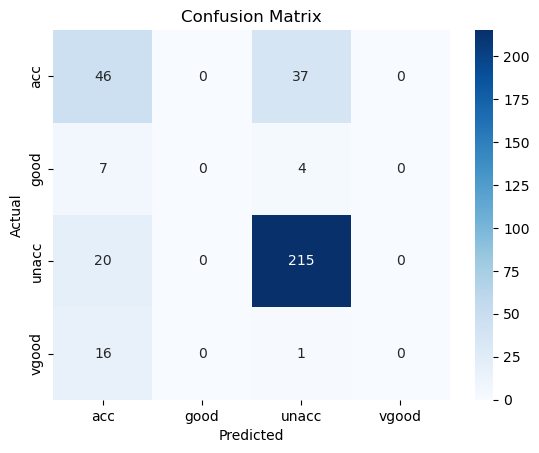

In [66]:
print(f"classification_report {classification_report(y_test,y_pred_logistic)}")
cm=confusion_matrix(y_test,y_pred_logistic)
sns.heatmap(data=cm,cmap="Blues",annot=True,xticklabels=np.unique(y_test),yticklabels=np.unique(y_test),fmt="d")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [67]:
from sklearn.ensemble import RandomForestClassifier
rfc=RandomForestClassifier()
para_grid_rfc={
             "n_estimators": [50,80,100,200],
             "criterion": ['gini', 'entropy', 'log_loss'],
              'max_depth': [ 5,8, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search_rf = GridSearchCV(estimator=rfc, param_grid=para_grid_rfc, cv=5, scoring='accuracy', verbose=1, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

print("Best hyperparameters for Random Forest:", grid_search_rf.best_params_)
print("Best accuracy score for Random Forest:", grid_search_rf.best_score_)

best_model_rf = grid_search_rf.best_estimator_
y_pred_rfc=best_model_rf.predict(X_test)
test_accuracy_rf = accuracy_score(y_test, y_pred_rfc)
print("Test Accuracy (Random Forest):", test_accuracy_rf)

train_accuracy_rf = best_model_rf.score(X_train, y_train)
print("Train Accuracy (Random Forest):", train_accuracy_rf)

Fitting 5 folds for each of 432 candidates, totalling 2160 fits
Best hyperparameters for Random Forest: {'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
Best accuracy score for Random Forest: 0.9623606969078636
Test Accuracy (Random Forest): 0.9624277456647399
Train Accuracy (Random Forest): 1.0


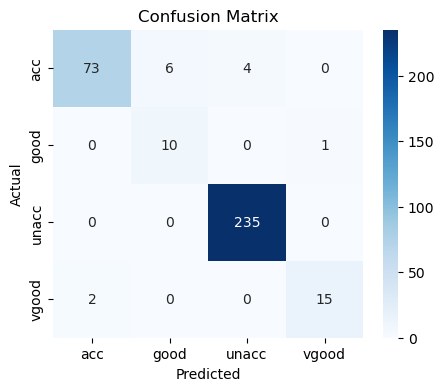

              precision    recall  f1-score   support

         acc     0.9733    0.8795    0.9241        83
        good     0.6250    0.9091    0.7407        11
       unacc     0.9833    1.0000    0.9916       235
       vgood     0.9375    0.8824    0.9091        17

    accuracy                         0.9624       346
   macro avg     0.8798    0.9177    0.8914       346
weighted avg     0.9672    0.9624    0.9633       346



In [68]:
cm = confusion_matrix(y_test, y_pred_rfc)

plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y_test), yticklabels=np.unique(y_test))
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


print(classification_report(y_test, y_pred_rfc, digits=4))